In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
from dotenv import load_dotenv



In [8]:
load_dotenv()

True

# Run Event Sim

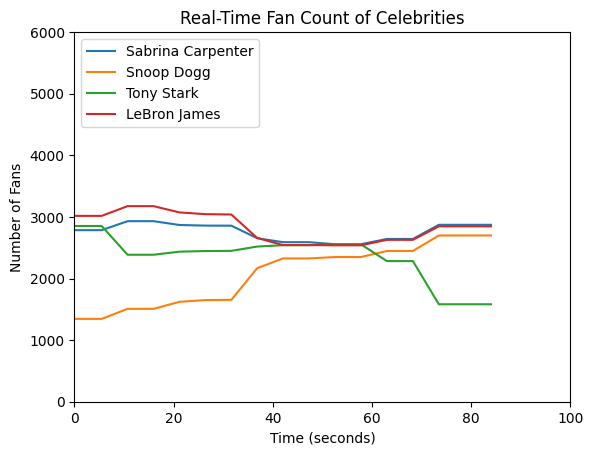

Real-time plot update interrupted.


In [2]:
# Function to create a raw MySQL connection
def create_connection():
    connection = mysql.connector.connect(
        host='localhost',
        user='root',
        password='zipcode123',
        database='starmeter_sim' 

    )
    return connection



# Function to retrieve the fan count for each celebrity
def get_fan_counts():
    connection = create_connection()
    query = """
    SELECT current_favorite, COUNT(*) as fan_count 
    FROM user_dynamic_preferences 
    GROUP BY current_favorite;
    """
    # Use the raw MySQL connection to fetch the data
    df = pd.read_sql(query, con=connection)
    connection.close()
    return df

# Function to display real-time updating line plot
def display_real_time_plot(refresh_interval=5):
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()

    # Initialize the plot
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Number of Fans')
    ax.set_title('Real-Time Fan Count of Celebrities')
    ax.set_ylim(0, 6000)  # Adjust according to expected fan counts
    ax.set_xlim(0, 1000)

    # To track data over time
    time_data = []
    fan_counts_data = {celebrity: [] for celebrity in ['Sabrina Carpenter', 'Snoop Dogg', 'Tony Stark', 'LeBron James']}

    # Initialize empty plot lines for each celebrity
    """
    lines = {}
    for celebrity in fan_counts_data.keys():
        lines[celebrity], = ax.plot([], [], label=celebrity)

    ax.legend(loc='upper left')
"""
    try:
        start_time = time.time()
        while True:
            current_time = time.time() - start_time
            time_data.append(current_time)

            # Fetch the latest fan counts
            
            df = get_fan_counts()
            for celebrity in fan_counts_data.keys():
                fan_count = df[df['current_favorite'] == celebrity]['fan_count'].sum() if not df[df['current_favorite'] == celebrity].empty else 0
                fan_counts_data[celebrity].append(fan_count)

            clear_output(wait=True)

            
            ax.clear()
            ax.set_xlabel('Time (seconds)')
            ax.set_ylabel('Number of Fans')
            ax.set_title('Real-Time Fan Count of Celebrities')
            ax.set_ylim(0, 6000)
            ax.set_xlim(0, 100)

            for celebrity, fan_counts in fan_counts_data.items():
                ax.plot(time_data, fan_counts, label=celebrity)
            ax.legend(loc='upper left')
            display(fig)

            plt.pause(0.1)

            time.sleep(refresh_interval)
    except KeyboardInterrupt:
        print("Real-time plot update interrupted.")
    finally:
        plt.ioff()
        plt.show()

# Main script
display_real_time_plot(refresh_interval=5)  # Update every 5 seconds
